<p style="text-align:center; font-size:24px;"><strong>Netflix Exploratory Data Analysis</p>

### Importing Libraries
### Loading Dataset
### Data Preparation
##### 1. Dropping Index Column
##### 2. Obtaining information about the data frame

##### 3. Counting the number of unique values in each column
### Missing values 
##### 1. Columns with missing values, their percentage and the number of missing values
##### 2. Number of repeat of each rating in the dataset
##### 3. Print the records that have their column 'rating' contain 'min'
##### 4. Copy the value of the column 'rating' which contains 'min' to the column 'duration'
##### 5. Remove the items that contain 'min' from column 'rating'
##### 6. Count the number of repeat of each rating in the dataset
##### 7. Columns with missing values, their percentage and the number of missing values - After Change
##### 8. Replace any missing value in 'director' columns to 'No Data'
##### 9. Remove the column 'show_id' to get ready to find duplicates
##### 10. Remove duplicates
##### 11. Decode elements in the 'cast' column to UTF-8 and store the result in 'decode_cast'	
### Visualisation
##### 1. Movie and TV Show distribution
##### 2. Most Popular Countries on Netflix
##### 3. Number of Movies and TV Shows by Country
##### 4. Number of Releases by Year
##### 5. Percentage of each Rating
##### 6. Percentage of Each Genre
##### 7. Top 15 directors
##### 8. Genres vs. Directors Heatmap
##### 9. Ratings of movies versus years
##### 10. Genres vs. Release Year Heatmap


In [1]:
#### Importing required libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from descartes import PolygonPatch
import numpy as np

### Loading the dataset

In [4]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##### Obtaining information about the data frame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##### Counting the number of unique values in each column

In [6]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

### Missing values 


##### Columns with missing values, their percentage and the number of missing values

In [7]:
missing_values_count = df.isna().sum()
missing_values_percentage = (df.isna().mean() * 100).round(2)
columns_with_missing_values = missing_values_percentage[missing_values_percentage > 0].index

print("Columns with missing values, their percentage and the number of missing values:\n")

# Find the length of the longest column name
max_col_name_length = max([len(col) for col in columns_with_missing_values])

print("Column Name\tPercentage\tNumber of Missing Values")
for col in columns_with_missing_values:
    col_name = col.ljust(max_col_name_length)
    print("{}\t{}%\t\t{}".format(col_name, missing_values_percentage[col], missing_values_count[col]))


Columns with missing values, their percentage and the number of missing values:

Column Name	Percentage	Number of Missing Values
director  	29.91%		2634
cast      	9.37%		825
country   	9.44%		831
date_added	0.11%		10
rating    	0.05%		4
duration  	0.03%		3


##### Number of repeat of each rating in the dataset

In [8]:
# Count the number of repeat of each rating in the dataset
rating_counts = df['rating'].value_counts()

# Print the resulting Series
print(rating_counts)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64


##### Looks like missing data in ‘duration’ happened by mistakenly entering the data in ‘rating’. To make sure
##### Print the records that have their column 'rating' contain 'min'

In [9]:
# Select rows where the 'rating' column contains the word 'min'
# na=False, so that missing values are not considered when checking if the 'rating' column contains the string 'min'
rows = df[df['rating'].str.contains('min', na=False)]

# Print the rows
print(rows)

     show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794      NaN    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813      NaN    Movies  The comic puts his trademark hilarious/thought...  


#####  Copy the value of the column 'rating' which contains 'min' to the column 'duration'

In [10]:
# na=False, so that missing values are not considered when checking if the 'rating' column contains the string 'min'
df.loc[df['rating'].str.contains('min', na=False), 'duration'] = df[df['rating'].str.contains('min', na=False)]['rating']


In [11]:
rows = df[df['rating'].str.contains('min', na=False)]

# Print the rows
print(rows)

     show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541   74 min    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794   84 min    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813   66 min    Movies  The comic puts his trademark hilarious/thought...  


##### Remove the items that contain 'min' from column 'rating'

In [12]:
df.loc[df['rating'].str.contains('min', na=False), 'rating'] = np.nan
rows = df[df['rating'].str.contains('min', na=False)]

# Print the rows
print(rows)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


##### Count the number of repeat of each rating in the dataset

In [13]:
rating_counts = df['rating'].value_counts()

# Print the resulting Series
print(rating_counts)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64


##### Columns with missing values, their percentage and the number of missing values - After Change

In [15]:
missing_values_count = df.isna().sum()
missing_values_percentage = (df.isna().mean() * 100).round(2)
columns_with_missing_values = missing_values_percentage[missing_values_percentage > 0].index

print("Columns with missing values, their percentage and the number of missing values:\n")

# Find the length of the longest column name
max_col_name_length = max([len(col) for col in columns_with_missing_values])

print("Column Name\tPercentage\tNumber of Missing Values")
for col in columns_with_missing_values:
    col_name = col.ljust(max_col_name_length)
    print("{}\t{}%\t\t{}".format(col_name, missing_values_percentage[col], missing_values_count[col]))

Columns with missing values, their percentage and the number of missing values:

Column Name	Percentage	Number of Missing Values
director  	29.91%		2634
cast      	9.37%		825
country   	9.44%		831
date_added	0.11%		10
rating    	0.08%		7


##### Replace any missing value in 'director' columns to 'No Data'

In [16]:
df['director'].replace(np.nan,'No Data', inplace=True)

##### Remove the column 'show_id' to get ready to find duplicates

In [17]:
df = df.drop('show_id', axis=1)
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,No Data,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
##### Remove duplicates

In [18]:
df.drop_duplicates(inplace=True)
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,No Data,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
##### Decode elements in the 'cast' column to UTF-8 and store the result in 'decode_cast'

In [19]:
# If the element is not a string,convert it to a string and decode it to UFT-8
df['decoded_cast'] = df['cast'].apply(lambda x: x.encode().decode('utf-8') if isinstance(x, str) else str(x))
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,decoded_cast
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan
1,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,TV Show,Jailbirds New Orleans,No Data,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",nan
4,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."


In [20]:
# Create a new column 'genres' that splits the 'listed_in' column by comma or &
df['genres'] = df['listed_in'].str.split(',|&')

# Use the explode method to convert the 'genres' column into a row for each genre
df = df.explode('genres')

# Trim the spaces around the word in the 'genres' column
df['genres'] = df['genres'].str.strip()

# filter out 'TV Shows' and 'Movies' from the 'genres' column
df = df[~df['genres'].isin(['TV Shows', 'Movies'])]

# Get the count of each genre
genre_counts = df['genres'].value_counts()

# Divide the count of each genre by the total number of rows
genre_percentages = genre_counts / df.shape[0] * 100

# Display the percentage of each genre
print(genre_percentages)

# Save the result to a file
genre_percentages.to_csv("genres_percentage.csv", header=False)

International Movies         12.588628
Dramas                       11.101962
Comedies                      7.657472
International TV Shows        6.179955
Adventure                     4.697864
Documentaries                 3.975116
Action                        3.929372
TV Dramas                     3.490234
Independent Movies            3.458213
Children                      2.932162
Family Movies                 2.932162
Romantic Movies               2.817803
TV Comedies                   2.657701
Thrillers                     2.639404
Crime TV Shows                2.149947
Kids' TV                      2.063035
Stand-Up Comedy               1.825168
Docuseries                    1.806871
Music                         1.715384
Musicals                      1.715384
Romantic TV Shows             1.692512
Horror Movies                 1.633045
Fantasy                       1.495814
Reality TV                    1.166461
British TV Shows              1.157312
Sci-Fi                   

### Visualisation

##### Movie and TV Show distribution

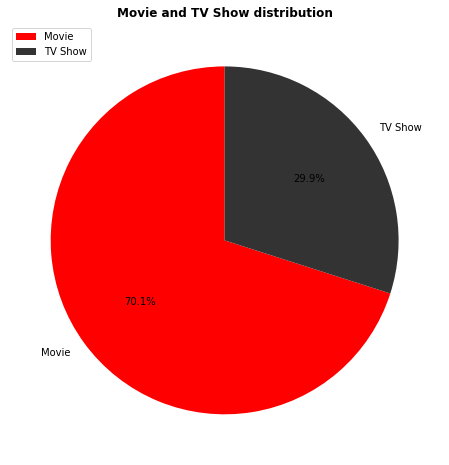

In [21]:
# Set the figsize
plt.figure(figsize=(8,8))

# Calculate the count of each type of content
content_types = df['type'].value_counts()

# Define the colors for the pie chart
colors = ['red', '#333333']

# Plot the pie chart
plt.pie(content_types, labels=content_types.index, colors=colors, startangle=90, autopct='%1.1f%%')

# Add a title
plt.title("Movie and TV Show distribution", fontweight='bold')

# Add a legend
plt.legend(content_types.index, loc='upper left')

# Show the plot
plt.show()

##### Most Popular Countries on Netflix

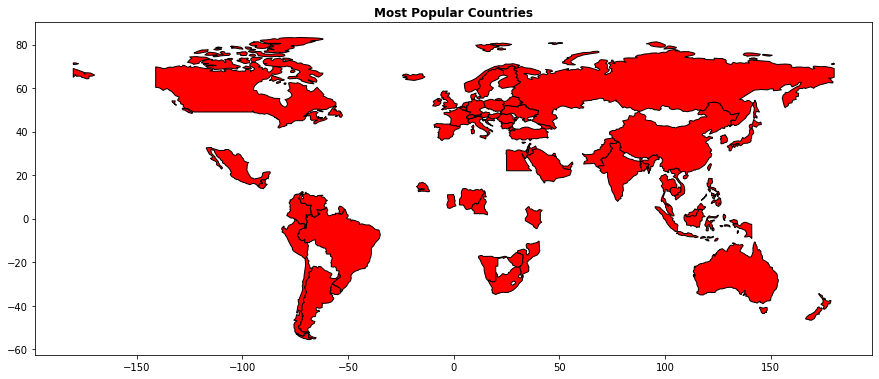

In [22]:

# Calculate the count of each country
countries = df['country'].value_counts()

# Load the world map into a GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to only include the most popular countries
most_popular_countries = world[world['name'].isin(countries.index)]

# Plot the map
fig, ax = plt.subplots(figsize=(15, 8))
most_popular_countries.plot(ax=ax, color='red', edgecolor='black')

# Add a title
plt.title("Most Popular Countries", fontweight='bold')

# Show the plot
plt.show()

In [23]:
# Calculate the number of distinct countries
distinct_countries = df['country'].nunique()

# Print the result
print("Number of distinct countries:", distinct_countries)

Number of distinct countries: 746


##### Number of Movies and TV Shows by Country

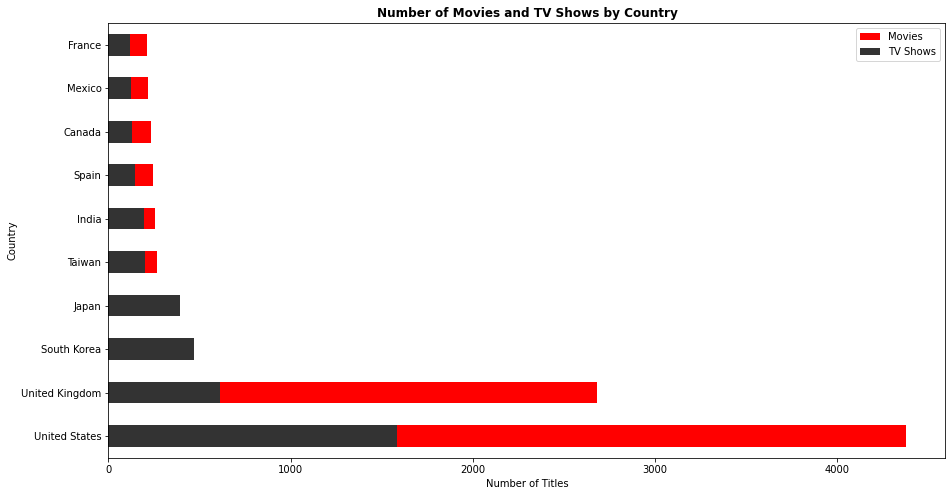

In [24]:
# Filter the data to only include movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Count the number of movies and TV shows by country
movies_by_country = movies['country'].value_counts().head(10)
tv_shows_by_country = tv_shows['country'].value_counts().head(10)

# Plot the data
fig, ax = plt.subplots(figsize=(15, 8))    
movies_by_country.plot(ax=ax, kind='barh', color='red', label='Movies')
tv_shows_by_country.plot(ax=ax, kind='barh', color='#333333', label='TV Shows')

# Add a title and axis labels
plt.title("Number of Movies and TV Shows by Country", fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Country")

# Add a legend
plt.legend()

# Show the plot
plt.show()

##### Insight:
Based on the data analyzed, the United States has the highest number of movies and TV shows available on Netflix with over 2000 titles, followed by the United Kingdom with around 800 titles. Japan has a significantly lower number of titles, with only around 200. The remaining countries included in the analysis have even fewer titles on Netflix. This indicates that a majority of the content available on the platform is produced in the United States, while the contributions from other countries are limited. The bar graph effectively visualizes the disparities in the number of titles by country and highlights the dominant player in the market.

##### Number of Releases by Year

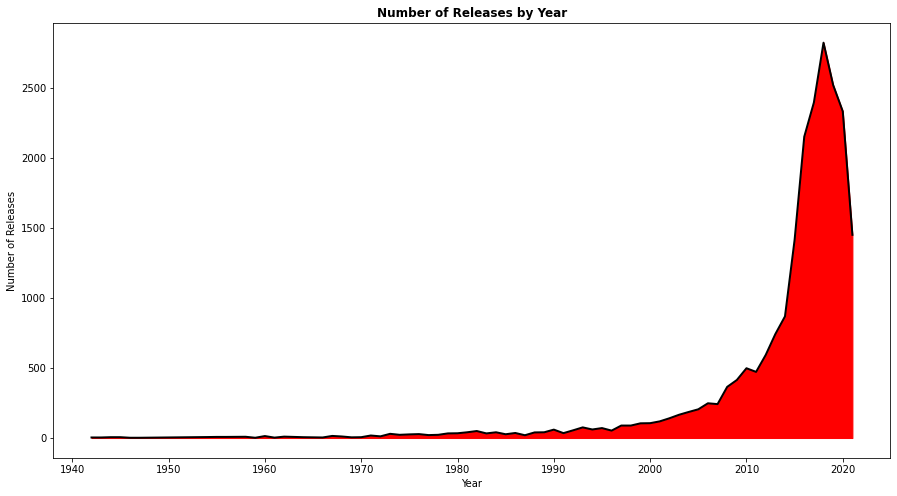

In [25]:
# Extract the release year for each movie/TV show
release_years = df['release_year'].dropna().astype(int)

# Count the number of releases for each year
release_counts = release_years.value_counts()

# Sort the years in ascending order
release_counts = release_counts.sort_index()

# Create a figure with desired figsize
plt.figure(figsize=(15,8))

# Plot the line chart
plt.plot(release_counts.index, release_counts.values, color='black', linewidth=2)

# Fill in the underline with red
plt.fill_between(release_counts.index, release_counts.values, 0, color='red')

# Add the title
plt.title("Number of Releases by Year", fontweight='bold')

# Label the x-axis
plt.xlabel("Year")

# Label the y-axis
plt.ylabel("Number of Releases")

# Show the plot
plt.show()

##### Percentage of each Rating

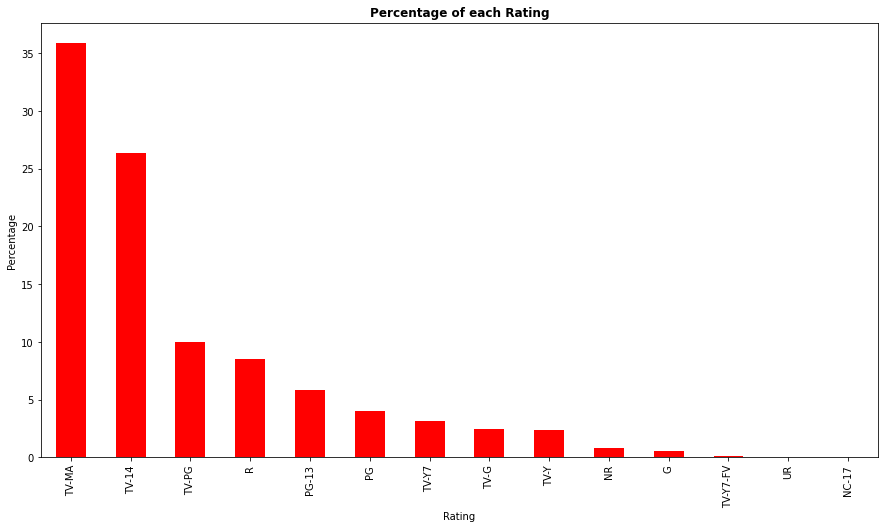

In [26]:
# Count the number of ratings for each rating level
rating_counts = df['rating'].value_counts(normalize=True) * 100

# Plot the bar chart
rating_counts.plot(kind='bar', figsize=(15, 8), color='red')

# Add the x-axis labels
plt.xlabel("Rating")

# Add the y-axis label
plt.ylabel("Percentage")

# Add the title
plt.title("Percentage of each Rating", fontweight='bold')

# Show the plot
plt.show()

##### Insight:
Based on the results of the bar chart, we can see that the majority of the ratings on Netflix are TV-MA (above 36%) and TV-14 (around 24%). These two ratings indicate content that may not be suitable for younger viewers. This could mean that Netflix's audience primarily consists of adult viewers who enjoy more mature content.

Additionally, it is notable that the majority of the ratings are TV-related, indicating that Netflix has a significant number of TV shows in its library. This could also contribute to the high percentage of TV-MA and TV-14 ratings.

Lastly, it is important to note that the percentages of the less common ratings (such as G, NR, NC-17, and UR) are very low, less than 1%. This suggests that Netflix has a limited selection of content that is rated as suitable for all ages or has not been rated by the classification system.

##### Percentage of Each Genre

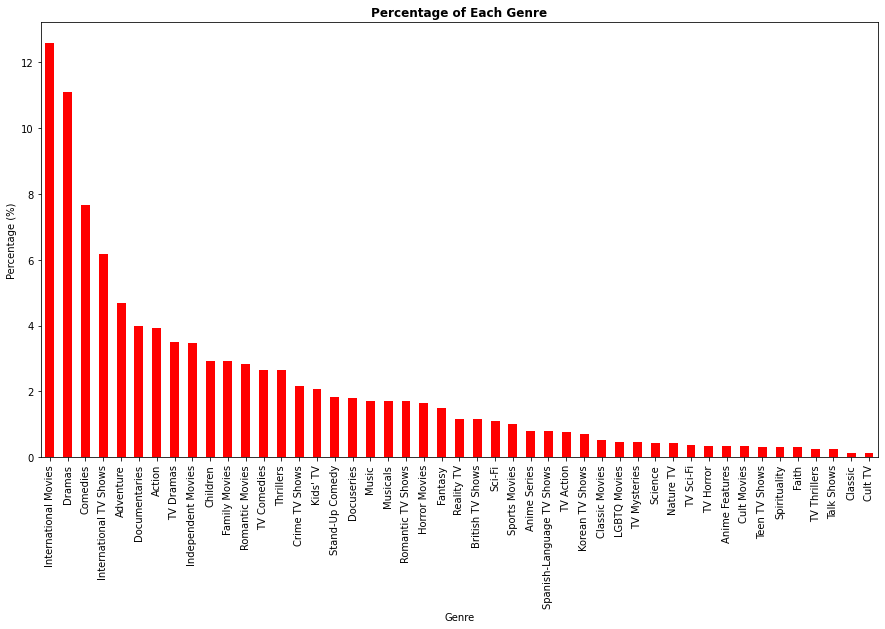

In [27]:
# Create a bar plot of the genre percentages
genre_percentages.plot.bar(figsize=(15, 8), color='red')

# Add title and labels to the plot
plt.title('Percentage of Each Genre', fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Percentage (%)')

# Show the plot
plt.show()

##### Insight:
International Movies and Dramas are the top two most popular genres with 12.6% and 11% respectively. Comedies and International TV Shows follow with 7.7% and 6%. The rest of the genres have a lower percentage, with the least popular being Classic and Cult TV with only 0.13%. The genres with the highest percentage after the top four are Adventure, Documentaries, and Action.

##### Top 15 directors

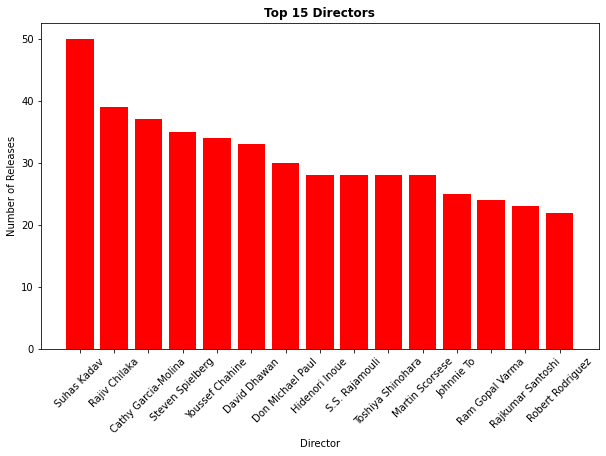

In [28]:
# Drop the rows with 'No Data' in the 'director' column
df = df[df['director'] != 'No Data']

# Calculate the count of each director
director_counts = df['director'].value_counts().nlargest(15)

# Define the x-axis and y-axis data for the bar chart
x = director_counts.index
y = director_counts.values

# Set the figure size
fig, ax = plt.subplots(figsize=(10,6))

# Plot the bar chart
ax.bar(x, y, color='red')

# Add the title
plt.title("Top 15 Directors", fontweight='bold')

# Label the x-axis
plt.xlabel("Director")

# Label the y-axis
plt.ylabel("Number of Releases")

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

##### Genres vs. Directors Heatmap

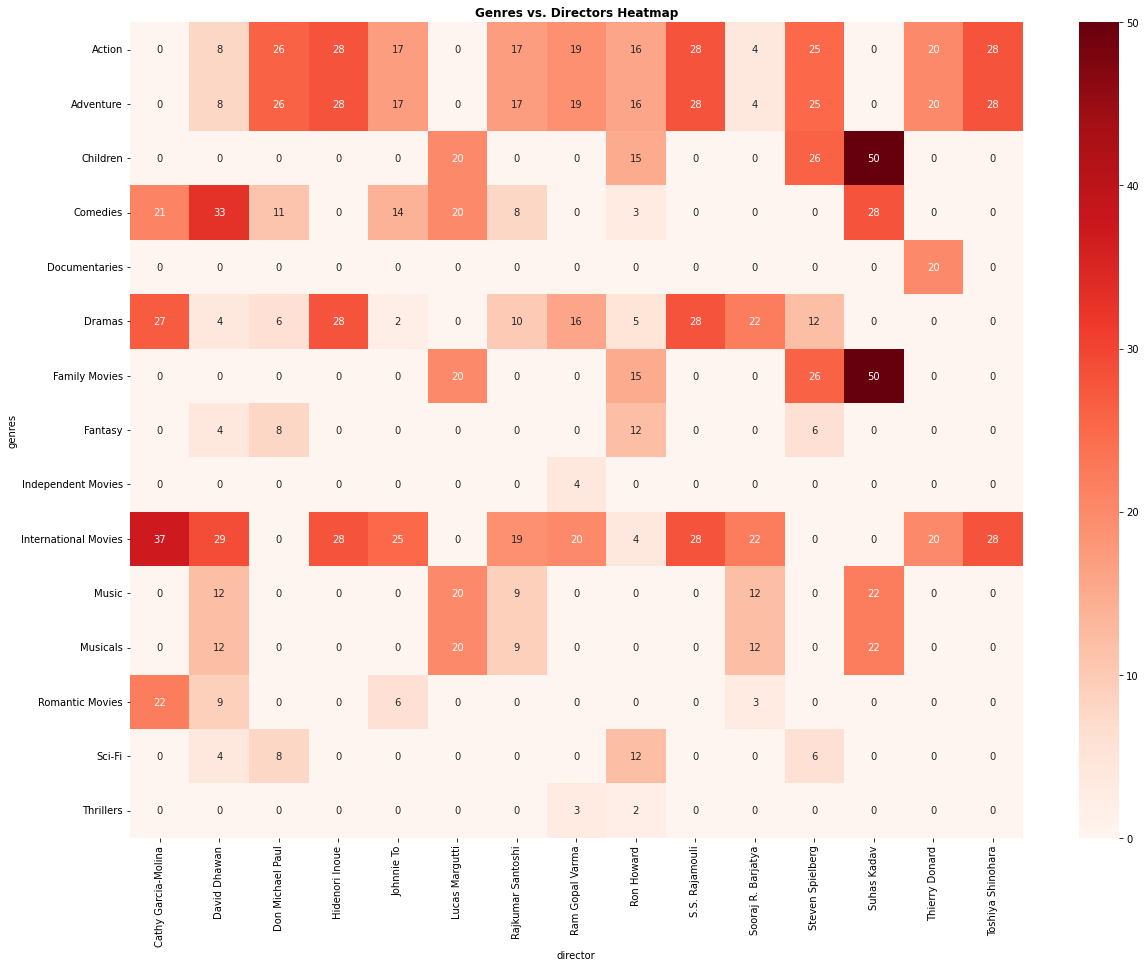

In [29]:
# Create a new column 'genres' that splits the 'listed_in' column by comma or &
df['genres'] = df['listed_in'].str.split(',|&')

# Use the explode method to convert the 'genres' column into a row for each genre
df = df.explode('genres')

# Trim the spaces around the word in the 'genres' column
df['genres'] = df['genres'].str.strip()

# Get the count of each genre
genre_counts = df['genres'].value_counts()

# Get the top-15 genres
top_genres = genre_counts.index[:15]

# Filter the dataframe to only keep rows with a genre in the top-15
df = df[df['genres'].isin(top_genres)]

# Get the count of each director
director_counts = df['director'].value_counts()

# Get the top-15 directors
top_directors = director_counts.index[:15]

# Filter the dataframe to only keep rows with a director in the top-15
df = df[df['director'].isin(top_directors)]

# Create a pivot table to show the relationship between genres and directors
pivot_table = df.pivot_table(index='genres', columns='director', aggfunc='size')

# Remove the non-finite values (NA or infinity)
pivot_table = pivot_table[np.isfinite(pivot_table)]

# Replaces any non-finite values with 0 and then casts the values to integers
pivot_table = pivot_table.round().fillna(0).astype(int)

# Plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt='d') # fmt='d' : normal numbers

# Add a title
plt.title("Genres vs. Directors Heatmap", fontweight='bold')

# Show the plot
plt.show()




##### Ratings of movies versus years

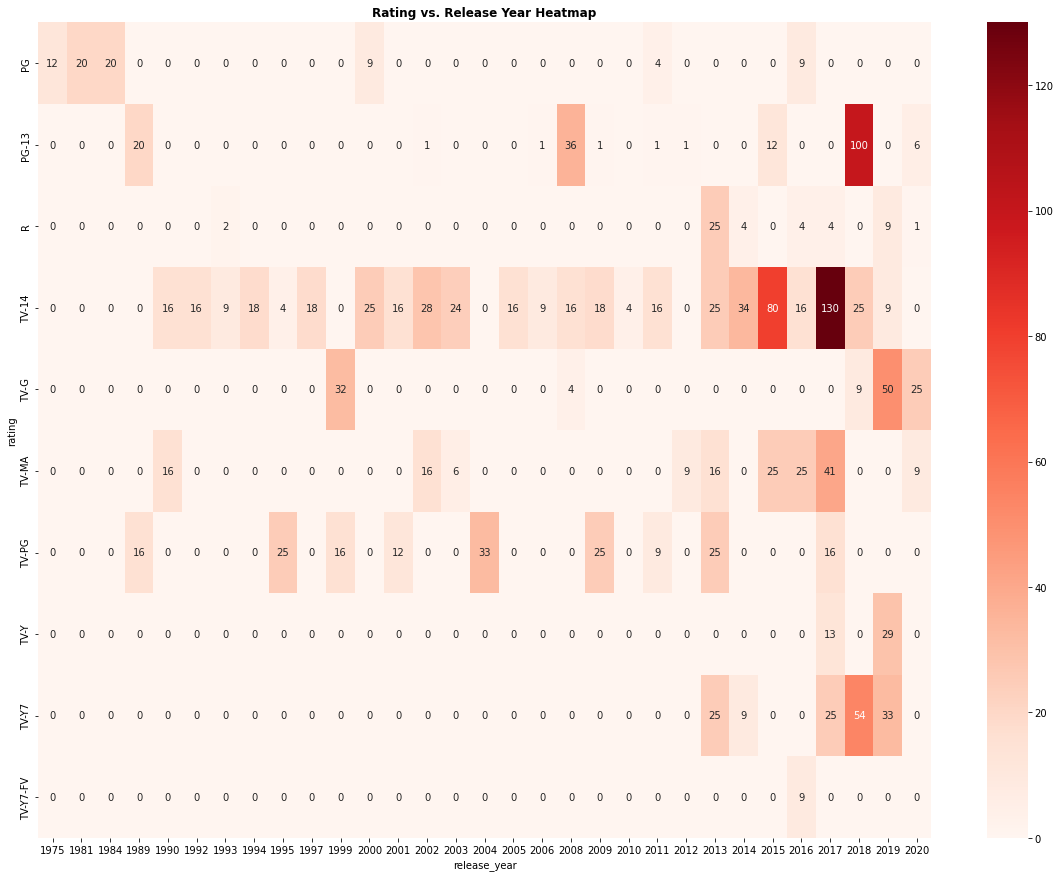

In [30]:
# Create a pivot table to show the relationship between rating and release year
pivot_table = df.pivot_table(index='rating', columns='release_year', aggfunc='size')

# Remove the non-finite values (NA or infinity)
pivot_table = pivot_table[np.isfinite(pivot_table)]

# Replaces any non-finite values with 0 and then casts the values to integers
pivot_table = pivot_table.round().fillna(0).astype(int)

# Plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt='d')

# Add a title
plt.title("Rating vs. Release Year Heatmap", fontweight='bold')

# Show the plot
plt.show()

##### Genres vs. Release Year Heatmap

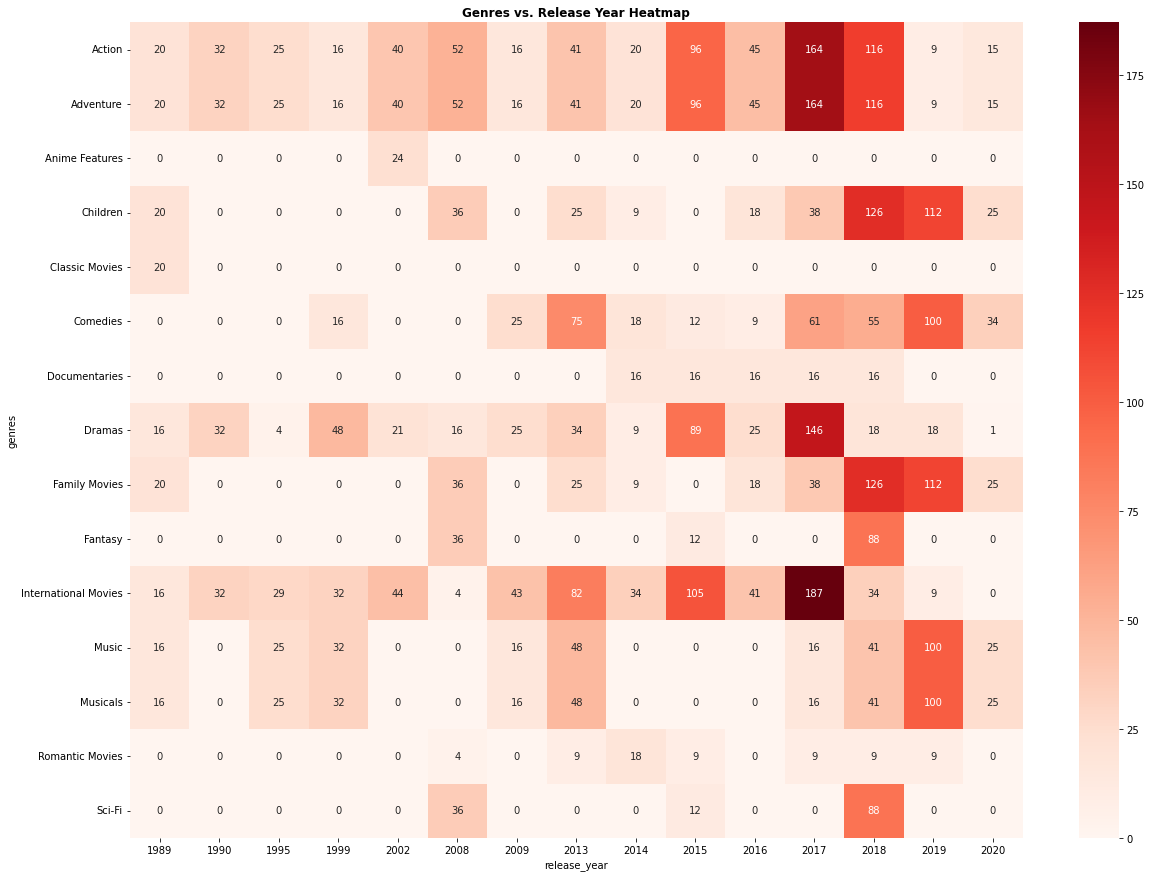

In [31]:
# Create a new column 'genres' that splits the 'listed_in' column by comma or &
df['genres'] = df['listed_in'].str.split(',|&')

# Use the explode method to convert the 'genres' column into a row for each genre
df = df.explode('genres')

# Trim the spaces around the word in the 'genres' column
df['genres'] = df['genres'].str.strip()

# Get the count of each genre
genre_counts = df['genres'].value_counts()

# Get the top-15 genres
top_genres = genre_counts.index[:15]

# Filter the dataframe to only keep rows with a genre in the top-15
df = df[df['genres'].isin(top_genres)]

# Get the count of each release year
release_year_counts = df['release_year'].value_counts()

# Get the top-15 release years
top_release_years = release_year_counts.index[:15]

# Filter the dataframe to only keep rows with a release year in the top-15
df = df[df['release_year'].isin(top_release_years)]

# Create a pivot table to show the relationship between genres and release years
pivot_table = df.pivot_table(index='genres', columns='release_year', aggfunc='size')

# Remove the non-finite values (NA or infinity)
pivot_table = pivot_table[np.isfinite(pivot_table)]

# Replaces any non-finite values with 0 and then casts the values to integers
pivot_table = pivot_table.round().fillna(0).astype(int)

# Plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt='d') # fmt='d' : normal numbers

# Add a title
plt.title("Genres vs. Release Year Heatmap", fontweight='bold')

# Show the plot
plt.show()